In [10]:
# Importing the libraries we're going to need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# this allows plots to appear directly in the notebook
%matplotlib inline

In [11]:
# Let's setup our fuel consumption data from 2010 to july 2017
fuel = pd.read_csv('Fuel Efficiciency/Fuel_FO_2010-17_loc_ml.csv', sep = ';',index_col='Ind',encoding='latin-1', low_memory=False)
fuel.head(5)

,IN,Train_Bulletin,Sector,DateTime1,Id_Loc,Track_id,Id_Engineer,Id_fireman,Hours,Kilometers,...,Id_Sub_Type,Sub_Type,id_Type,Type,Traccion,Direction,Id_Model_Loc,Model_Loc,UTC,GTK
Ind,,,,,,,,,,,,,,,,,,,,,
0,TREN,32175,N,26/04/2017,5409,1,67.0,252.0,0,56,...,2,CARGA GENERAL,1,CARGA,S,0,38,GE U20C,UTR,36
1,TREN,32177,N,26/04/2017,11,1,104.0,285.0,0,35,...,2,CARGA GENERAL,1,CARGA,S,1,9,GE U10B,UTR,21
2,TREN,32178,N,26/04/2017,5409,1,67.0,252.0,0,56,...,2,CARGA GENERAL,1,CARGA,S,1,38,GE U20C,UTR,84
3,TREN,32187,N,27/04/2017,6931,1,18.0,286.0,0,35,...,2,CARGA GENERAL,1,CARGA,S,1,43,HM,UTR,21
4,TREN,32188,N,27/04/2017,21,1,72.0,91.0,0,56,...,2,CARGA GENERAL,1,CARGA,S,0,28,GM,UTR,27


In [12]:
fuel.dtypes

IN                 object
Train_Bulletin      int64
Sector             object
DateTime1          object
Id_Loc              int64
Track_id            int64
Id_Engineer       float64
Id_fireman        float64
Hours               int64
Kilometers          int64
Liters              int64
Net_Ton_Km_r        int64
Gross_Ton_km        int64
Net_Tons            int64
Gross_Tons          int64
Date               object
Locomotive          int64
Track              object
Maquinista         object
Auxiliar           object
Train_nbr          object
Id_Sub_Type         int64
Sub_Type           object
id_Type             int64
Type               object
Traccion           object
Direction           int64
Id_Model_Loc        int64
Model_Loc          object
UTC                object
GTK                 int64
dtype: object

In [13]:
# We're adding a Lts per GTK and since GTK is a very large number we make a second column of GTK in billions
f = fuel
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)
f['GTK_9'] = ((f['Gross_Ton_km'] / 1000000000)).astype(float)
len_loc = len(f)
# We want to show the distribution of the unit trains in the East with simple traction
#f = f[(f.Sector == 'E') & (f.Liters >40) & (f.UTC == 'UTR') & (f.IN == 'TREN') & (f.Gross_Ton_km >0) & (f.Traccion == 'S') & (f.Track_id <=6) & (f.Hours < 48) & (f.Lts_x_GTK < 13000)]

#f.groupby(['UTC','Sub_Type','Model_Loc','Track_id']).size()

In [14]:
print(len_loc)

89979


In [15]:
# We are showing more than 100% of the local data
len(f)/ len_loc

1.0

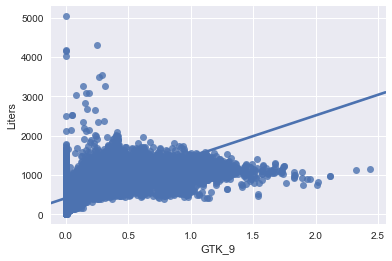

In [16]:
# Is there a direct linear relationship between GTK and Liters in these trains
sns.regplot(y="Liters", x="GTK_9", data=f, fit_reg = True)

There is no direct linear relationship, but there seems to be linear patterns within the relationship

In [17]:
# Let's use all the data again
f= fuel
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)
f['GTK_9'] = ((f['Gross_Ton_km'] / 1000000000)).astype(float)
# create six dummy variables for track_id using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Track_id, prefix='SD').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)

# create six dummy variables for Locomotive Type using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Locomotive, prefix='LOC').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)


# create six dummy variables for Train Type using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Id_Sub_Type, prefix='TRN').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)

# create a new Series called Tract - Number of Locomotives
f['Tract'] = f.Traccion.map({'S':1,'M':0})

# create a new Series called IsUnit
f['IsUnit'] = f.UTC.map({'UTR':1,'NUT':0,'PAS':-1})

f.head()

,IN,Train_Bulletin,Sector,DateTime1,Id_Loc,Track_id,Id_Engineer,Id_fireman,Hours,Kilometers,...,TRN_3,TRN_4,TRN_5,TRN_6,TRN_8,TRN_9,TRN_10,TRN_11,Tract,IsUnit
Ind,,,,,,,,,,,,,,,,,,,,,
0,TREN,32175,N,26/04/2017,5409,1,67.0,252.0,0,56,...,0,0,0,0,0,0,0,0,1,1
1,TREN,32177,N,26/04/2017,11,1,104.0,285.0,0,35,...,0,0,0,0,0,0,0,0,1,1
2,TREN,32178,N,26/04/2017,5409,1,67.0,252.0,0,56,...,0,0,0,0,0,0,0,0,1,1
3,TREN,32187,N,27/04/2017,6931,1,18.0,286.0,0,35,...,0,0,0,0,0,0,0,0,1,1
4,TREN,32188,N,27/04/2017,21,1,72.0,91.0,0,56,...,0,0,0,0,0,0,0,0,1,1


In [18]:
# Export the results
f.to_csv('Fuel Efficiciency/Fuel_FO_2010-17_loc_ml_raw.csv', sep = ';',encoding='latin-1')

In [19]:
# import other necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

C:\Users\225648\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [20]:
#choose the predictor columns (X) with all the predictors and the dependent variable (y) Liters
feature_cols = ['GTK_9', 'Hours', 'Kilometers', 'IsUnit', 'Tract','SD_2', 'SD_3', 'SD_4', 'SD_5', 'SD_6', 
#                'MOD_10','MOD_28','MOD_38','MOD_40','MOD_42','MOD_43',
                'TRN_2', 'TRN_3', 'TRN_4', 'TRN_5', 'TRN_6', 'TRN_8', 'TRN_9', 'TRN_10', 'TRN_11',
                'LOC_345', 'LOC_347', 'LOC_851', 'LOC_966', 'LOC_971', 'LOC_972', 'LOC_973', 'LOC_974', 'LOC_975', 
                'LOC_976', 'LOC_977', 'LOC_978', 'LOC_979', 'LOC_1014', 'LOC_1201', 'LOC_1202', 'LOC_1203', 'LOC_1601', 
                'LOC_1602', 'LOC_2000', 'LOC_2001', 'LOC_2002', 'LOC_2003', 'LOC_2004', 'LOC_2005', 'LOC_2006', 'LOC_2007', 
                'LOC_2008', 'LOC_2009', 'LOC_2010', 'LOC_2011', 'LOC_2012', 'LOC_2201', 'LOC_2301', 'LOC_2302', 'LOC_2303', 
                'LOC_2304', 'LOC_2305', 'LOC_2306', 'LOC_2307', 'LOC_8689']
#                'T_10', 'T_101', 'T_101A', 'T_101E', 'T_101ME', 'T_102', 'T_102A', 'T_102E', 'T_103', 'T_103A', 'T_103E', 
#                'T_104', 'T_104E', 'T_105', 'T_106E', 'T_10E', 'T_13', 'T_13E', 'T_14', 'T_14E', 'T_151', 'T_151A', 'T_151E', 
#                'T_152', 'T_152E', 'T_153', 'T_153E', 'T_154', 'T_154E', 'T_155', 'T_156', 'T_157', 'T_157A', 'T_157E', 
#                'T_157M', 'T_157ME', 'T_158', 'T_158A', 'T_158E', 'T_158M', 'T_158ME', 'T_158e', 'T_159', 'T_159A', 'T_159E', 
#                'T_159M', 'T_159ME', 'T_160', 'T_160A', 'T_160E', 'T_160M', 'T_160ME', 'T_161', 'T_161A', 'T_161E', 'T_161M', 
#                'T_161ME', 'T_162', 'T_162A', 'T_162E', 'T_162M', 'T_162ME', 'T_162m', 'T_163', 'T_164', 'T_164E', 'T_171', 
#                'T_171E', 'T_172', 'T_172E', 'T_173', 'T_173E', 'T_174', 'T_174E', 'T_175', 'T_175E', 'T_176', 'T_176E', 
#                'T_180', 'T_181', 'T_182', 'T_183', 'T_1E', 'T_1M', 'T_2', 'T_200', 'T_201', 'T_202', 'T_203', 'T_204', 
#                'T_205', 'T_230', 'T_231', 'T_240', 'T_241', 'T_242', 'T_243', 'T_244', 'T_245', 'T_2E', 'T_2M', 'T_3', 
#                'T_301', 'T_4', 'T_4E', 'T_7', 'T_700', 'T_701', 'T_702', 'T_703', 'T_704', 'T_705', 'T_740', 'T_741', 
#                'T_742', 'T_743', 'T_7E', 'T_8', 'T_8E', 'T_9', 'T_900', 'T_901', 'T_902', 'T_903', 'T_905', 'T_940', 
#                'T_941', 'T_944', 'T_9E', 'T_GU-PZ', 'T_Int-O', 'T_Intern', 'T_PL-GU', 'T_S-INT', 'T_T-Esp', 'T_T-Esp1']

X = f[feature_cols]
y = f.Liters


In [21]:
# Separate train and test set
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.33, random_state = 5)


In [22]:
# This creates a LinearRegression object with all the variables
lm = LinearRegression()
regr = lm.fit(X_train, Y_train)

# print coefficients
#list(zip(feature_cols, lm.coef_))

In [23]:
# Import regression modules
# ols - stands for Ordinary least squares
#import statsmodels.api as sm
#from statsmodels.formula.api import ols

# The thing inside the "quotes" is called a formula
#m = ols('Y_test ~ GTK_9 + Hours + Kilometers + IsUnit + Tract + SD_2 + SD_3 + SD_4 + SD_5 + SD_6 + MOD_10 + MOD_28 + MOD_38 + MOD_40 + MOD_42 + MOD_43 + TRN_2 + TRN_3 + TRN_4 + TRN_5 + TRN_6 + TRN_8 + TRN_9 + TRN_10 + TRN_11 ',X_test).fit()
#print (m.summary())

In [24]:
D_T = len(feature_cols)  
Y_pred_train = regr.predict(X_train[list(feature_cols)]) 
# We calculate the RSS with respect to the training data
RSS_TRAIN_T = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_T = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_T = len(X_train)   
RSE_TRAIN_T = ((RSS_TRAIN_T/(N_TRAIN_T-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = regr.predict(X_test[list(feature_cols)]) 
RSS_TEST_T = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_T = ((Y_test - Y_test.mean()) ** 2).sum()    
N_TEST_T = len(X_test)  
RSE_TEST_T = ((RSS_TEST_T/(N_TEST_T-2)) ** 0.5)
   
MSE_TRAIN_T = mean_squared_error(Y_train, (Y_pred_train))    
MSE_TEST_T = mean_squared_error(Y_test, (Y_pred_test))

R2s_TRAIN_T = r2_score(Y_train, (Y_pred_train))
R2s_TEST_T = r2_score(Y_test, (Y_pred_test))    

#R2_TRAIN_F = regr.rsquared
#MSEr_TRAIN_F = regr.mse_resid
#R2_TEST_F = r2_score(Y_test, Y_pred_test) 

#print("OLS Fwd Training R2: {0:6.1f}% ".format ((R2_TRAIN_F*100)))  
#print("OLS Fwd Training MSE_resid: {0:6.2f} ".format ((MSEr_TRAIN_F)))      
print("OLS loc Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_T, RSS_TEST_T))
print("OLS loc Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_T, TSS_TEST_T))
print("OLS loc Training R2: {0:6.1f}% Test R2: {1:6.1f}%".format ((R2s_TRAIN_T*100), (R2s_TEST_T*100)))   
print("OLS loc Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_T, MSE_TEST_T))    
print("OLS loc Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_T, RSE_TEST_T))    
print("OLS Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} local Q: {3:6d}".format (D_T,N_TRAIN_T,N_TEST_T,N_TRAIN_T+N_TEST_T))

Y_pred_loc_regr = regr.predict(X[feature_cols])


OLS loc Training RSS: 1479288140.81 Test RSS: 697314504.85
OLS loc Training TSS: 9746640737.01 Test TSS: 4766021354.31
OLS loc Training R2:   84.8% Test R2:   85.4%
OLS loc Training MSE: 24538.25 Test MSE: 23483.35
OLS loc Training RSE: 156.65 Test RSE: 153.25
OLS Coeffients:     60 Train Q:  60285 Test Q:  29694 local Q:  89979


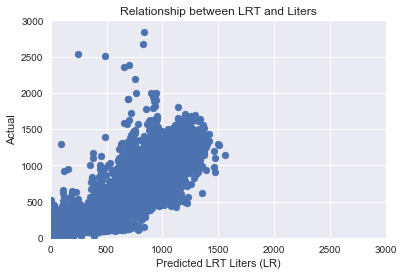

In [25]:
# Is the relationship linear
plt.scatter(Y_pred_test, Y_test)
plt.xlim( 0, 3000 ) 
plt.ylim( 0, 3000 ) 
plt.xlabel("Predicted LRT Liters (LR)")
plt.ylabel("Actual")
plt.title("Relationship between LRT and Liters")

We can perform best subset selection by identifying the best model that contains a given number of predictors, where **best** is quantified using RSS. We'll define a helper function to outputs the best set of variables for
each model size:

In [26]:
# The following four functions are a python adaptation of ISL p. 248-251 by R. Jordan Crouser at Smith College found in:
#http://www.science.smith.edu/~jcrouser/SDS293/labs/lab9/Lab%209%20-%20Subset%20Selection%20in%20Python.pdf
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    
# Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
# We calculate the RSS with respect to the test data
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    
    return {"model":regr, "RSS":RSS}



# Forward Stepwise Selection
We can also use a similar approach to perform forward stepwise
or backward stepwise selection, using a slight modification of the functions we defined above:

In [27]:
def forward(predictors, X_train, y_train, X_test, y_test):
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
          # Return the best model, along with some other useful information about the model
    return best_model


In [28]:
modelf_train = pd.DataFrame(columns=["RSS", "model"])
tic = time.time()
predictors = []
for i in range(1,len(X_train.columns)+1):
#    modelf_train.loc[i] = forward(predictors, X[train], y[train]["Liters"], X[test], y[test]["Liters"])
    modelf_train.loc[i] = forward(predictors, X_train, Y_train, X_test, Y_test)
    predictors = modelf_train.loc[i]["model"].model.exog_names
toc = time.time()
print("local elapsed time:", (toc-tic), "seconds.")

Processed  60 models on 1 predictors in 0.5135388374328613 seconds.
Processed  59 models on 2 predictors in 0.8127472400665283 seconds.
Processed  58 models on 3 predictors in 0.9568865299224854 seconds.
Processed  57 models on 4 predictors in 1.2536170482635498 seconds.
Processed  56 models on 5 predictors in 1.5646893978118896 seconds.
Processed  55 models on 6 predictors in 1.7871181964874268 seconds.
Processed  54 models on 7 predictors in 2.0085208415985107 seconds.
Processed  53 models on 8 predictors in 2.287155866622925 seconds.
Processed  52 models on 9 predictors in 2.679083824157715 seconds.
Processed  51 models on 10 predictors in 2.4256558418273926 seconds.
Processed  50 models on 11 predictors in 2.5418124198913574 seconds.
Processed  49 models on 12 predictors in 3.183525323867798 seconds.
Processed  48 models on 13 predictors in 3.3909788131713867 seconds.
Processed  47 models on 14 predictors in 3.609492540359497 seconds.
Processed  46 models on 15 predictors in 3.9119

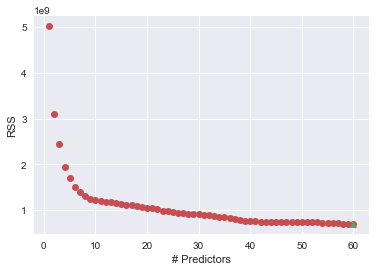

In [29]:
plt.plot(modelf_train["RSS"], "or")
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(modelf_train["RSS"].argmin(), modelf_train["RSS"].min(), "g^")

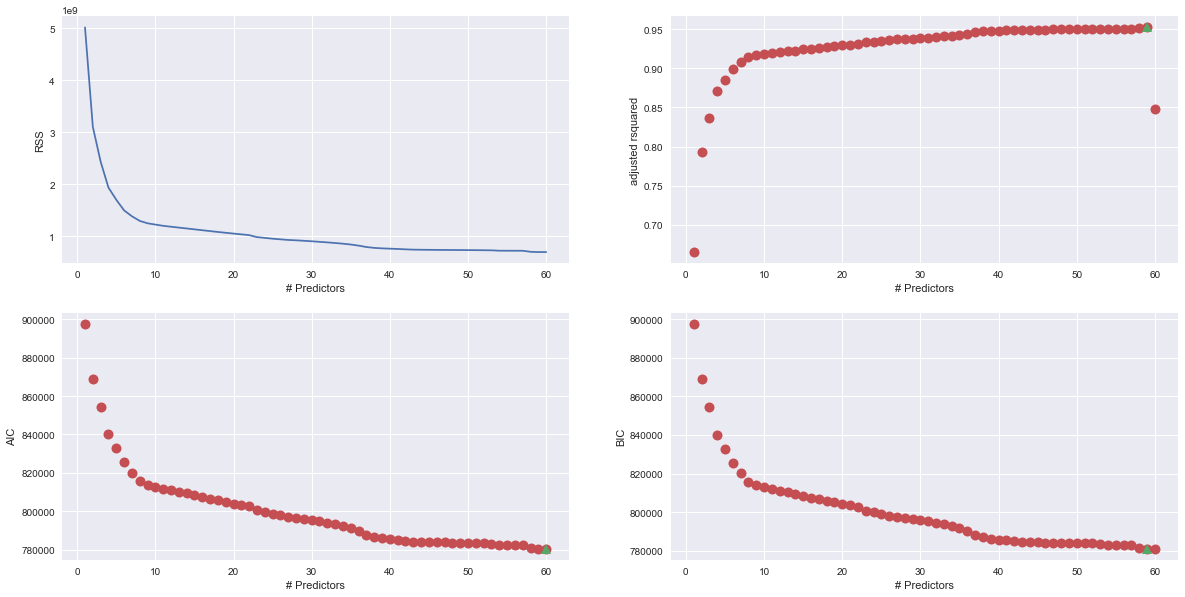

In [30]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot the line of RSS which monotonically decreases as Predictors Increase

plt.plot(modelf_train["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
rsquared = modelf_train.apply(lambda row: row[1].rsquared, axis=1)
plt.subplot(2, 2, 2)
plt.plot(rsquared, "or")
plt.plot(rsquared.argmax(), rsquared.max(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic

aic = modelf_train.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic, "or")
plt.plot(aic.argmin(), aic.min(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('AIC')
bic = modelf_train.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic, "or")
plt.plot(bic.argmin(), bic.min(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [31]:
D_T_F = min([rsquared.argmax(), aic.argmin(), bic.argmin()])
feature_cols_F = list(modelf_train.loc[D_T_F, "model"].model.exog_names)

# We calculate the RSS with respect to the training data
Y_pred_train = modelf_train.loc[D_T_F, "model"].predict(X_train[feature_cols_F])
RSS_TRAIN_F = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_F = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_F = len(X_train)   
RSE_TRAIN_F = ((RSS_TRAIN_F/(N_TRAIN_F-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = modelf_train.loc[D_T_F, "model"].predict(X_test[feature_cols_F])
RSS_TEST_F = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_F = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_F = len(X_test)  
RSE_TEST_F = ((RSS_TEST_F/(N_TEST_F-2)) ** 0.5)
   
MSE_TRAIN_F = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_F = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_F = r2_score(Y_train, Y_pred_train) 
R2s_TEST_F = r2_score(Y_test, Y_pred_test) 

R2_TRAIN_F = modelf_train.loc[D_T_F, "model"].rsquared
MSEr_TRAIN_F = modelf_train.loc[D_T_F, "model"].mse_resid
#R2_TEST_F = r2_score(Y_test, Y_pred_test) 

print("OLS Fwd Training R2: {0:6.1f}% ".format ((R2_TRAIN_F*100)))  
print("OLS Fwd Training MSE_resid: {0:6.2f} ".format ((MSEr_TRAIN_F)))  
print("OLS Fwd Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_F, RSS_TEST_F))
print("OLS Fwd Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_F, TSS_TEST_F))
print("OLS Fwd Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_F*100), (R2s_TEST_F*100)))   

#print("OLS Fwd Training R2: {0:6.1f}% Test R2: {1:6.1f}%".format (((1-(RSS_TRAIN_F/TSS_TRAIN_F))*100), ((1-(RSS_TEST_F/TSS_TEST_F))*100)))   
print("OLS Fwd Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_F, MSE_TEST_F))    
print("OLS Fwd Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_F, RSE_TEST_F))    
print("OLS Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} local Q: {3:6d}".format (D_T_F,N_TRAIN_F,N_TEST_F,N_TRAIN_F+N_TEST_F))

Y_pred_loc_f = modelf_train.loc[D_T_F, "model"].predict(X[feature_cols_F])


OLS Fwd Training R2:   95.2% 
OLS Fwd Training MSE_resid: 24566.39 
OLS Fwd Training RSS: 1479535109.54 Test RSS: 697407194.15
OLS Fwd Training TSS: 9746640737.01 Test TSS: 4766021354.31
OLS Fwd Training R2s:   84.8% Test R2s:   85.4%
OLS Fwd Training MSE: 24542.34 Test MSE: 23486.47
OLS Fwd Training RSE: 156.66 Test RSE: 153.26
OLS Coeffients:     59 Train Q:  60285 Test Q:  29694 local Q:  89979


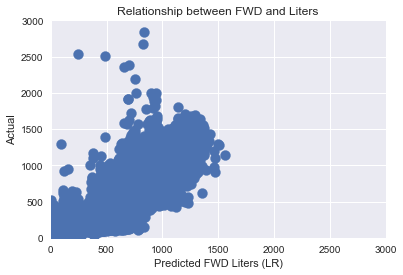

In [32]:
# Is the relationship linear
plt.scatter(Y_pred_test, Y_test)
plt.xlim( 0, 3000 ) 
plt.ylim( 0, 3000 ) 
plt.xlabel("Predicted FWD Liters (LR)")
plt.ylabel("Actual")
plt.title("Relationship between FWD and Liters")

In [33]:
print(modelf_train.loc[58, "model"].mse_resid)
print(modelf_train.loc[58, "model"].mse_total)
print(modelf_train.loc[58, "model"].summary())

24726.4867549
511715.660065
                            OLS Regression Results                            
Dep. Variable:                 Liters   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 2.047e+04
Date:                Fri, 15 Sep 2017   Prob (F-statistic):               0.00
Time:                        11:40:52   Log-Likelihood:            -3.9042e+05
No. Observations:               60285   AIC:                         7.810e+05
Df Residuals:                   60227   BIC:                         7.815e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Kilometers     0.5013   

# Backward Stepwise Selection
We can also use a similar approach to perform backward stepwise selection:

In [34]:
def backward(predictors, X_train, y_train, X_test, y_test):
    tic = time.time()
    results = []
    for combo in itertools.combinations(predictors, len(predictors)-1):
        #results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))
        results.append(processSubset (combo, X_train, y_train, X_test, y_test))
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.") 
    # Return the best model, along with some other useful information about the model
    return best_model




In [35]:
'''
modelb_train = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X_train.columns)))
tic = time.time()
predictors = X_train.columns
while(len(predictors) > 1):
    modelb_train.loc[len(predictors)-1] = backward(predictors, X_train, Y_train, X_test, Y_test)
    predictors = modelb_train.loc[len(predictors)-1]["model"].model.exog_names
toc = time.time()
print("local elapsed time:", (toc-tic), "seconds.")
'''

'\nmodelb_train = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X_train.columns)))\ntic = time.time()\npredictors = X_train.columns\nwhile(len(predictors) > 1):\n    modelb_train.loc[len(predictors)-1] = backward(predictors, X_train, Y_train, X_test, Y_test)\n    predictors = modelb_train.loc[len(predictors)-1]["model"].model.exog_names\ntoc = time.time()\nprint("local elapsed time:", (toc-tic), "seconds.")\n'

In [36]:
'''
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot the line of RSS which monotonically decreases as Predictors Increase

plt.plot(modelb_train["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
rsquared = modelb_train.apply(lambda row: row[1].rsquared, axis=1)
plt.subplot(2, 2, 2)
plt.plot(rsquared, "or")
plt.plot(rsquared.argmax(), rsquared.max(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic

aic = modelb_train.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic, "or")
plt.plot(aic.argmin(), aic.min(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('AIC')
bic = modelf_train.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic, "or")
plt.plot(bic.argmin(), bic.min(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('BIC')
'''

'\nplt.figure(figsize=(20,10))\nplt.rcParams.update({\'font.size\': 18, \'lines.markersize\': 10})\n\n# Set up a 2x2 grid so we can look at 4 plots at once\nplt.subplot(2, 2, 1)\n\n# We will now plot the line of RSS which monotonically decreases as Predictors Increase\n\nplt.plot(modelb_train["RSS"])\nplt.xlabel(\'# Predictors\')\nplt.ylabel(\'RSS\')\n\n# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.\n# The argmax() function can be used to identify the location of the maximum point of a vector\nrsquared = modelb_train.apply(lambda row: row[1].rsquared, axis=1)\nplt.subplot(2, 2, 2)\nplt.plot(rsquared, "or")\nplt.plot(rsquared.argmax(), rsquared.max(), "g^")\nplt.xlabel(\'# Predictors\')\nplt.ylabel(\'adjusted rsquared\')\n\n# We\'ll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic\n\naic = modelb_train.apply(lambda row: row[1].aic, axis=1)\n\nplt.subplot(2, 2, 3)\nplt.plot(aic, "or")\nplt.plot(aic.argm

In [37]:
'''
D_T_B = min([rsquared.argmax(), aic.argmin(), bic.argmin()])
feature_cols_B = list(modelb_train.loc[D_T_B, "model"].model.exog_names)

# We calculate the RSS with respect to the training data
Y_pred_train = modelb_train.loc[D_T_B, "model"].predict(X_train[feature_cols_B])
RSS_TRAIN_B = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_B = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_B = len(X_train)   
RSE_TRAIN_B = ((RSS_TRAIN_B/(N_TRAIN_B-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = modelb_train.loc[D_T_B, "model"].predict(X_test[feature_cols_B])
RSS_TEST_B = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_B = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_B = len(X_test)  
RSE_TEST_B = ((RSS_TEST_B/(N_TEST_B-2)) ** 0.5)
   
MSE_TRAIN_B = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_B = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_B = r2_score(Y_train, Y_pred_train) 
R2s_TEST_B = r2_score(Y_test, Y_pred_test) 

R2_TRAIN_B = modelb_train.loc[D_T_B, "model"].rsquared
MSEr_TRAIN_B = modelb_train.loc[D_T_B, "model"].mse_resid
#R2_TEST_B = r2_score(Y_test, Y_pred_test) 

print("OLS Bwd Training R2: {0:6.1f}% ".format ((R2_TRAIN_B*100)))  
print("OLS Bwd Training MSE_resid: {0:6.2f} ".format ((MSEr_TRAIN_B)))  
print("OLS Bwd Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_B, RSS_TEST_B))
print("OLS Bwd Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_B, TSS_TEST_B))
print("OLS Bwd Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_B*100), (R2s_TEST_B*100)))   

#print("OLS Bwd Training R2: {0:6.1f}% Test R2: {1:6.1f}%".format (((1-(RSS_TRAIN_B/TSS_TRAIN_B))*100), ((1-(RSS_TEST_B/TSS_TEST_B))*100)))   
print("OLS Bwd Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_B, MSE_TEST_B))    
print("OLS Bwd Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_B, RSE_TEST_B))    
print("OLS Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} local Q: {3:6d}".format (D_T_B,N_TRAIN_B,N_TEST_B,N_TRAIN_B+N_TEST_B))

Y_pred_loc_b = modelb_train.loc[D_T_B, "model"].predict(X[feature_cols_B])
'''

'\nD_T_B = min([rsquared.argmax(), aic.argmin(), bic.argmin()])\nfeature_cols_B = list(modelb_train.loc[D_T_B, "model"].model.exog_names)\n\n# We calculate the RSS with respect to the training data\nY_pred_train = modelb_train.loc[D_T_B, "model"].predict(X_train[feature_cols_B])\nRSS_TRAIN_B = ((Y_pred_train - Y_train) ** 2).sum()\nTSS_TRAIN_B = ((Y_train - Y_train.mean()) ** 2).sum()    \nN_TRAIN_B = len(X_train)   \nRSE_TRAIN_B = ((RSS_TRAIN_B/(N_TRAIN_B-2)) ** 0.5)\n# We calculate the RSS with respect to the test data\nY_pred_test = modelb_train.loc[D_T_B, "model"].predict(X_test[feature_cols_B])\nRSS_TEST_B = ((Y_pred_test - Y_test) ** 2).sum()\nTSS_TEST_B = ((Y_test - Y_test.mean()) ** 2).sum()  \nN_TEST_B = len(X_test)  \nRSE_TEST_B = ((RSS_TEST_B/(N_TEST_B-2)) ** 0.5)\n   \nMSE_TRAIN_B = mean_squared_error(Y_train, Y_pred_train)    \nMSE_TEST_B = mean_squared_error(Y_test, Y_pred_test)\n\n\nR2s_TRAIN_B = r2_score(Y_train, Y_pred_train) \nR2s_TEST_B = r2_score(Y_test, Y_pred_test

In [38]:
'''
# Is the relationship linear
plt.scatter(Y_pred_test, Y_test)
plt.xlim( 0, 3000 ) 
plt.ylim( 0, 3000 ) 
plt.xlabel("Predicted BW Liters (LR)")
plt.ylabel("Actual")
plt.title("Relationship between BW and Liters")
'''

'\n# Is the relationship linear\nplt.scatter(Y_pred_test, Y_test)\nplt.xlim( 0, 3000 ) \nplt.ylim( 0, 3000 ) \nplt.xlabel("Predicted BW Liters (LR)")\nplt.ylabel("Actual")\nplt.title("Relationship between BW and Liters")\n'

In [39]:
#print(models2.loc[19, "model"].summary())
#print(modelf_train.loc[19, "model"].summary())

In [40]:
#feature_y_cols = ['Liters', 'GTK_9', 'Hours', 'Kilometers', 'IsUnit', 'Tract','SD_2', 'SD_3', 'SD_4', 'SD_5', 'SD_6', 
#                'MOD_10', 'MOD_28', 'MOD_38', 'MOD_40', 'MOD_42', 'MOD_43', 
#                'TRN_2', 'TRN_3', 'TRN_4', 'TRN_5', 'TRN_6', 'TRN_8', 'TRN_9', 'TRN_10', 'TRN_11']
#coef= f[feature_y_cols]

In [42]:
# Compute the correlation matrix
#corr = coef.corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f_, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Model selection using Cross-Validation

Now let's try to choose among the models of different sizes using cross-validation.
This approach is somewhat involved, as we must perform forward selection within each of the $k$ training sets. Despite this, we see that
with its clever subsetting syntax, ${\tt python}$ makes this job quite easy. First, we
create a vector that assigns each observation to one of $k = 10$ folds, and
we create a DataFrame in which we will store the results:

In order for the validation set approach to yield accurate estimates of the test
error, we must use *only the training observations* to perform all aspects of
model-fitting — including variable selection. Therefore, the determination of
which model of a given size is best must be made using *only the training
observations*. This point is subtle but important. If the full data set is used
to perform the best subset selection step, the validation set errors and
cross-validation errors that we obtain will not be accurate estimates of the
test error.

In [43]:
k=10        # number of folds
np.random.seed(seed=1)
folds = np.random.choice(k, size = len(Y_train), replace = True)

# Create a DataFrame to store the results of our upcoming calculations
cv_errors = pd.DataFrame(columns=range(1,k+1), index=range(1,26))
cv_errors = cv_errors.fillna(0)
#cv_errors

In [44]:
models_cv = pd.DataFrame(columns=["RSS", "model"])


# Outer loop iterates over all folds
for j in range(1,k+1):

    # Reset predictors
    predictors = []
    
    # Inner loop iterates over each size i
    for i in range(1,len(X.columns)+1):    
    
        # The perform forward selection on the full dataset minus the jth fold, test on jth fold

#        models_cv.loc[i] = forward(predictors, X_train[folds != (j-1)], Y_train[folds != (j-1)], X_train[folds == (j-1)], Y_train[folds == (j-1)])


        models_cv.loc[i] = forward(predictors, X_train[folds != (j-1)], Y_train[folds != (j-1)], X_test, Y_test)

        # Save the cross-validated error for this fold
        cv_errors[j][i] = models_cv.loc[i]["RSS"]

        # Extract the predictors
        predictors = models_cv.loc[i]["model"].model.exog_names
        #predictors = models_cv.loc[i]["model"].model.exog_names        

Processed  60 models on 1 predictors in 0.3979678153991699 seconds.
Processed  59 models on 2 predictors in 0.664160966873169 seconds.
Processed  58 models on 3 predictors in 0.8559055328369141 seconds.
Processed  57 models on 4 predictors in 1.3634822368621826 seconds.
Processed  56 models on 5 predictors in 1.4160895347595215 seconds.
Processed  55 models on 6 predictors in 2.0316519737243652 seconds.
Processed  54 models on 7 predictors in 1.763664722442627 seconds.
Processed  53 models on 8 predictors in 2.067371129989624 seconds.
Processed  52 models on 9 predictors in 2.6710526943206787 seconds.
Processed  51 models on 10 predictors in 2.5249292850494385 seconds.
Processed  50 models on 11 predictors in 2.776890277862549 seconds.
Processed  49 models on 12 predictors in 3.0755105018615723 seconds.
Processed  48 models on 13 predictors in 3.107877492904663 seconds.
Processed  47 models on 14 predictors in 2.9371068477630615 seconds.
Processed  46 models on 15 predictors in 3.87961

Processed  59 models on 2 predictors in 0.7786846160888672 seconds.
Processed  58 models on 3 predictors in 0.9559035301208496 seconds.
Processed  57 models on 4 predictors in 1.1439731121063232 seconds.
Processed  56 models on 5 predictors in 1.2455532550811768 seconds.
Processed  55 models on 6 predictors in 1.5127511024475098 seconds.
Processed  54 models on 7 predictors in 1.7497014999389648 seconds.
Processed  53 models on 8 predictors in 1.723783016204834 seconds.
Processed  52 models on 9 predictors in 2.019183874130249 seconds.
Processed  51 models on 10 predictors in 2.4566617012023926 seconds.
Processed  50 models on 11 predictors in 2.515331983566284 seconds.
Processed  49 models on 12 predictors in 2.569577217102051 seconds.
Processed  48 models on 13 predictors in 2.7865371704101562 seconds.
Processed  47 models on 14 predictors in 2.931195020675659 seconds.
Processed  46 models on 15 predictors in 3.1896111965179443 seconds.
Processed  45 models on 16 predictors in 3.2768

Processed  58 models on 3 predictors in 1.0156943798065186 seconds.
Processed  57 models on 4 predictors in 1.244898796081543 seconds.
Processed  56 models on 5 predictors in 1.4663236141204834 seconds.
Processed  55 models on 6 predictors in 1.6556439399719238 seconds.
Processed  54 models on 7 predictors in 1.6128466129302979 seconds.
Processed  53 models on 8 predictors in 1.7836337089538574 seconds.
Processed  52 models on 9 predictors in 2.0068585872650146 seconds.
Processed  51 models on 10 predictors in 2.6706879138946533 seconds.
Processed  50 models on 11 predictors in 2.2596921920776367 seconds.
Processed  49 models on 12 predictors in 2.3574066162109375 seconds.
Processed  48 models on 13 predictors in 2.5741806030273438 seconds.
Processed  47 models on 14 predictors in 3.228140354156494 seconds.
Processed  46 models on 15 predictors in 3.695812940597534 seconds.
Processed  45 models on 16 predictors in 3.298570156097412 seconds.
Processed  44 models on 17 predictors in 3.71

Processed  57 models on 4 predictors in 1.2652778625488281 seconds.
Processed  56 models on 5 predictors in 1.3561115264892578 seconds.
Processed  55 models on 6 predictors in 1.576155185699463 seconds.
Processed  54 models on 7 predictors in 2.137068271636963 seconds.
Processed  53 models on 8 predictors in 2.592365026473999 seconds.
Processed  52 models on 9 predictors in 2.2237956523895264 seconds.
Processed  51 models on 10 predictors in 1.9947450160980225 seconds.
Processed  50 models on 11 predictors in 2.2263195514678955 seconds.
Processed  49 models on 12 predictors in 2.5758535861968994 seconds.
Processed  48 models on 13 predictors in 3.047663688659668 seconds.
Processed  47 models on 14 predictors in 2.722827911376953 seconds.
Processed  46 models on 15 predictors in 3.0363309383392334 seconds.
Processed  45 models on 16 predictors in 3.070237159729004 seconds.
Processed  44 models on 17 predictors in 3.3885085582733154 seconds.
Processed  43 models on 18 predictors in 3.588

Processed  56 models on 5 predictors in 1.9765644073486328 seconds.
Processed  55 models on 6 predictors in 2.1053409576416016 seconds.
Processed  54 models on 7 predictors in 2.406362533569336 seconds.
Processed  53 models on 8 predictors in 2.700140953063965 seconds.
Processed  52 models on 9 predictors in 2.999581813812256 seconds.
Processed  51 models on 10 predictors in 3.0393660068511963 seconds.
Processed  50 models on 11 predictors in 3.3852641582489014 seconds.
Processed  49 models on 12 predictors in 3.0179665088653564 seconds.
Processed  48 models on 13 predictors in 3.270566701889038 seconds.
Processed  47 models on 14 predictors in 3.4228672981262207 seconds.
Processed  46 models on 15 predictors in 3.186520576477051 seconds.
Processed  45 models on 16 predictors in 3.036195755004883 seconds.
Processed  44 models on 17 predictors in 3.2390341758728027 seconds.
Processed  43 models on 18 predictors in 3.680508852005005 seconds.
Processed  42 models on 19 predictors in 3.589

In [45]:
#cv_errors

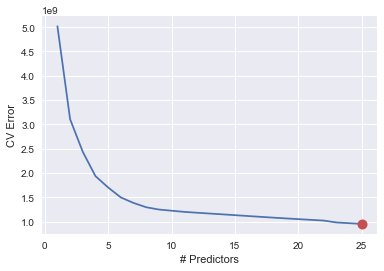

In [46]:
cv_mean = cv_errors.apply(np.mean, axis=1)

plt.plot(cv_mean)
plt.xlabel('# Predictors')
plt.ylabel('CV Error')
plt.plot(cv_mean.argmin(), cv_mean.min(), "or")

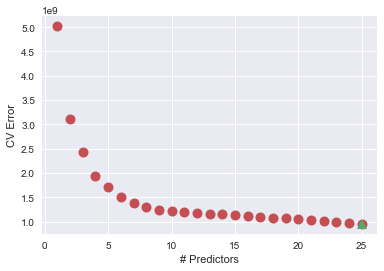

In [47]:
cv_mean = cv_errors.apply(np.mean, axis=1)

#plt.plot(cv_mean)
plt.xlabel('# Predictors')
plt.ylabel('CV Error')
plt.plot(cv_mean, "or")
plt.plot(cv_mean.argmin(), cv_mean.min(),  "g^")


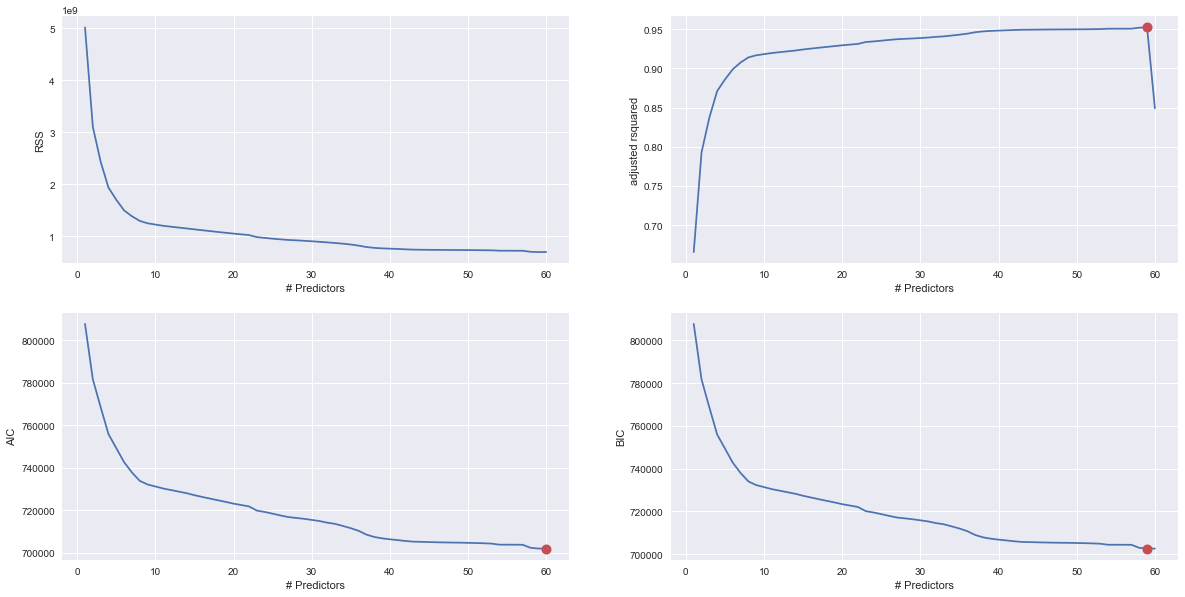

In [48]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_cv["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
rsquared = models_cv.apply(lambda row: row[1].rsquared, axis=1)
plt.subplot(2, 2, 2)
plt.plot(rsquared)
plt.plot(rsquared.argmax(), rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic

aic = models_cv.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_cv.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [49]:
# In this case the forward or backward stepwise give the same predictors
print(modelf_train.loc[59, "model"].summary())
#print(modelb_train.loc[19, "model"].summary())


                            OLS Regression Results                            
Dep. Variable:                 Liters   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 2.026e+04
Date:                Fri, 15 Sep 2017   Prob (F-statistic):               0.00
Time:                        12:33:39   Log-Likelihood:            -3.9023e+05
No. Observations:               60285   AIC:                         7.806e+05
Df Residuals:                   60226   BIC:                         7.811e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Kilometers     0.4871      0.011     42.556      0.0

In [106]:
print(models_cv.loc[59, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                 Liters   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.833e+04
Date:                Fri, 15 Sep 2017   Prob (F-statistic):               0.00
Time:                        15:42:06   Log-Likelihood:            -3.5098e+05
No. Observations:               54248   AIC:                         7.021e+05
Df Residuals:                   54189   BIC:                         7.026e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Kilometers     0.4925      0.012     40.972      0.0

In [50]:
D_T_CV = min([rsquared.argmax(), aic.argmin(), bic.argmin()])
feature_cols_CV = list(models_cv.loc[D_T_CV, "model"].model.exog_names)

# We calculate the RSS with respect to the training data
Y_pred_train = models_cv.loc[D_T_CV, "model"].predict(X_train[feature_cols_CV])
RSS_TRAIN_CV = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_CV = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_CV = len(X_train)   
RSE_TRAIN_CV = ((RSS_TRAIN_CV/(N_TRAIN_CV-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = models_cv.loc[D_T_CV, "model"].predict(X_test[feature_cols_CV])
RSS_TEST_CV = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_CV = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_CV = len(X_test)  
RSE_TEST_CV = ((RSS_TEST_CV/(N_TEST_CV-2)) ** 0.5)
   
MSE_TRAIN_CV = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_CV = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_CV = r2_score(Y_train, Y_pred_train) 
R2s_TEST_CV = r2_score(Y_test, Y_pred_test) 

R2_TRAIN_CV = models_cv.loc[D_T_CV, "model"].rsquared
MSEr_TRAIN_CV = models_cv.loc[D_T_CV, "model"].mse_resid
#R2_TEST_CV = r2_score(Y_test, Y_pred_test) 

print("OLS CV Training R2: {0:6.1f}% ".format ((R2_TRAIN_CV*100)))  
print("OLS CV Training MSE_resid: {0:6.2f} ".format ((MSEr_TRAIN_CV)))  
print("OLS CV Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_CV, RSS_TEST_CV))
print("OLS CV Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_CV, TSS_TEST_CV))
print("OLS CV Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_CV*100), (R2s_TEST_CV*100)))   

#print("OLS CV Training R2: {0:6.1f}% Test R2: {1:6.1f}%".format (((1-(RSS_TRAIN_CV/TSS_TRAIN_CV))*100), ((1-(RSS_TEST_CV/TSS_TEST_CV))*100)))   
print("OLS CV Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_CV, MSE_TEST_CV))    
print("OLS CV Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_CV, RSE_TEST_CV))    
print("OLS Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} local Q: {3:6d}".format (D_T_CV,N_TRAIN_CV,N_TEST_CV,N_TRAIN_CV+N_TEST_CV))


Y_pred_loc_cv = models_cv.loc[D_T_CV, "model"].predict(X[feature_cols_CV])


OLS CV Training R2:   95.2% 
OLS CV Training MSE_resid: 24418.55 
OLS CV Training RSS: 1479717778.37 Test RSS: 697162149.76
OLS CV Training TSS: 9746640737.01 Test TSS: 4766021354.31
OLS CV Training R2s:   84.8% Test R2s:   85.4%
OLS CV Training MSE: 24545.37 Test MSE: 23478.22
OLS CV Training RSE: 156.67 Test RSE: 153.23
OLS Coeffients:     59 Train Q:  60285 Test Q:  29694 local Q:  89979


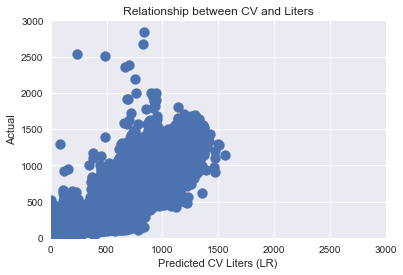

In [51]:
# Is the relationship linear
plt.scatter(Y_pred_test, Y_test)
plt.xlim( 0, 3000 ) 
plt.ylim( 0, 3000 ) 
plt.xlabel("Predicted CV Liters (LR)")
plt.ylabel("Actual")
plt.title("Relationship between CV and Liters")

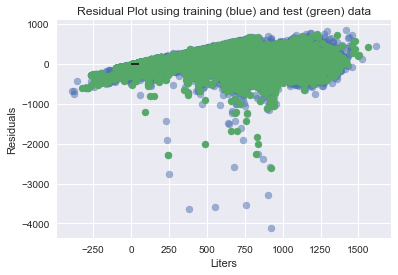

In [52]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=50, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=50)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.xlabel('Liters')

These funcitons on Ridge Regression and the Lasso is a Python adaptation of p. 251-255 of "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. Adapted by R. Jordan Crouser at Smith College for SDS293: Machine Learning (Spring 2016).

# Ridge Regression
The ${\tt Ridge()}$ function has an alpha argument ($\lambda$, but with a different name!) that is used to tune the model. We'll generate an array of alpha values ranging from very big to very small, essentially
covering the full range of scenarios from the null model containing
only the intercept, to the least squares fit:

In [53]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [54]:
alphas = 10**np.linspace(10,-2,100)*0.5
#alphas

Associated with each alpha value is a vector of ridge regression coefficients, which we'll
store in a matrix ${\tt coefs}$. In this case, it is a $25 \times 100$
matrix, with 25 rows (one for each predictor) and 100
columns (one for each value of alpha). Remember that we'll want to standardize the
variables so that they are on the same scale. To do this, we can use the
${\tt normalize=True}$ parameter:

In [55]:
ridge = Ridge(normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 60)

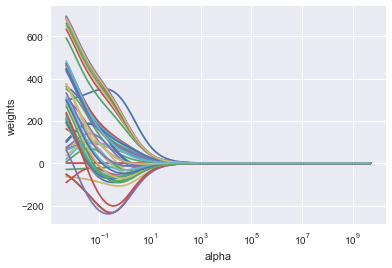

In [56]:
# As the alpha grows we expect the estimates are much lower
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [57]:
ridge2 = Ridge(alpha=4, normalize=True)
ridge2.fit(X_train, Y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
#print(pd.Series(ridge2.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(Y_test, pred2))        # Calculate the test MSE

83325.6575766


The test MSE when alpha = 4 is 133970. Now let's see what happens if we use a huge value of alpha, say $10^{10}$:

In [58]:
ridge3 = Ridge(alpha=10**10, normalize=True)
ridge3.fit(X_train, Y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
#print(pd.Series(ridge3.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(Y_test, pred3))        # Calculate the test MSE

160504.945208


Instead of arbitrarily choosing alpha, it would be better to
use cross-validation to choose the tuning parameter alpha. We can do this using
the cross-validated ridge regression function, ${\tt RidgeCV()}$. By default, the function
performs generalized cross-validation (an efficient form of LOOCV), though this can be changed using the
argument ${\tt cv}$.

In [59]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(X_train, Y_train)
ridgecv.alpha_

0.0050000000000000001

In [60]:
ridge_alph = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge_alph.fit(X_train, Y_train)
mean_squared_error(Y_test, ridge_alph.predict(X_test))

23738.843337045106

This does not represent an improvement over the test MSE that we got using
alpha $ = 0.005$. Finally, we refit our ridge regression model on the full data set,
using the value of alpha chosen by cross-validation, and examine the coefficient
estimates.

In [61]:
# alpha 0.005
ridge_alph.fit(X_test, Y_test)
#pd.Series(ridge_alph.coef_, index=X_test.columns)

Ridge(alpha=0.0050000000000000001, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [62]:
D_T_RDG = len(X_test.columns)
feature_cols_RDG = list(X_test.columns)
mean_squared_error(Y_test, ridge_alph.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = ridge_alph.predict(X_train[feature_cols_RDG])
RSS_TRAIN_RDG = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_RDG = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_RDG = len(X_train)   
RSE_TRAIN_RDG = ((RSS_TRAIN_RDG/(N_TRAIN_RDG-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = ridge_alph.predict(X_test[feature_cols_RDG])
RSS_TEST_RDG = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_RDG = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_RDG = len(X_test)  
RSE_TEST_RDG = ((RSS_TEST_RDG/(N_TEST_RDG-2)) ** 0.5)
   
MSE_TRAIN_RDG = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_RDG = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_RDG = r2_score(Y_train, Y_pred_train) 
R2s_TEST_RDG = r2_score(Y_test, Y_pred_test) 

#R2_TRAIN_RDG = ridge_alph.rsquared
#MSEr_TRAIN_RDG = ridge_alph.mse_resid
#R2_TEST_RDG = r2_score(Y_test, Y_pred_test) 

#print("OLS ridge_alph Training R2: {0:6.1f}% ".format ((R2_TRAIN_RDG*100)))  
#print("OLS ridge_alph Training MSE_resid: {0:6.2f} ".format ((MSEr_TRAIN_RDG)))  
print("OLS ridge_alph Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_RDG, RSS_TEST_RDG))
print("OLS ridge_alph Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_RDG, TSS_TEST_RDG))
print("OLS ridge_alph Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_RDG*100), (R2s_TEST_RDG*100)))   

#print("OLS CV Training R2: {0:6.1f}% Test R2: {1:6.1f}%".format (((1-(RSS_TRAIN_RDG/TSS_TRAIN_RDG))*100), ((1-(RSS_TEST_RDG/TSS_TEST_RDG))*100)))   
print("OLS ridge_alph Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_RDG, MSE_TEST_RDG))    
print("OLS ridge_alph Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_RDG, RSE_TEST_RDG))    
print("OLS Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} local Q: {3:6d}".format (D_T_RDG,N_TRAIN_RDG,N_TEST_RDG,N_TRAIN_RDG+N_TEST_RDG))

Y_pred_loc_rdg = ridge_alph.predict(X[feature_cols_RDG])


OLS ridge_alph Training RSS: 1499550691.79 Test RSS: 702515360.06
OLS ridge_alph Training TSS: 9746640737.01 Test TSS: 4766021354.31
OLS ridge_alph Training R2s:   84.6% Test R2s:   85.3%
OLS ridge_alph Training MSE: 24874.36 Test MSE: 23658.50
OLS ridge_alph Training RSE: 157.72 Test RSE: 153.82
OLS Coeffients:     60 Train Q:  60285 Test Q:  29694 local Q:  89979


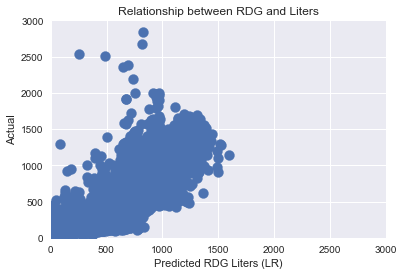

In [63]:
# Is the relationship linear
plt.scatter(Y_pred_test, Y_test)
plt.xlim( 0, 3000 ) 
plt.ylim( 0, 3000 ) 
plt.xlabel("Predicted RDG Liters (LR)")
plt.ylabel("Actual")
plt.title("Relationship between RDG and Liters")


# The Lasso
We saw that ridge regression in this case even with a wise choice of alpha cannot outperform least
squares as well as the null model on fuel consumption data set. We now ask
whether the lasso can yield either a more accurate or a more interpretable
model than ridge regression. In order to fit a lasso model, we'll
use the ${\tt Lasso()}$ function; however, this time we'll need to include the argument ${\tt max_iter=10000}$.
Other than that change, we proceed just as we did in fitting a ridge model:

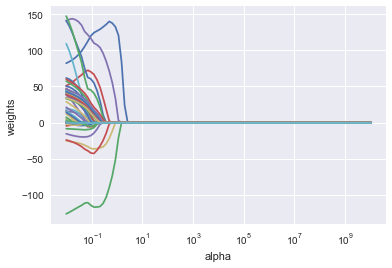

In [64]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), Y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Notice that in the coefficient plot that depending on the choice of tuning
parameter, some of the coefficients are exactly equal to zero. We now
perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:

In [65]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, Y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
mean_squared_error(Y_test, lasso.predict(X_test))

23648.830455128798

In [66]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

GTK_9         292.955889
Hours         -30.235294
Kilometers      0.520586
IsUnit         92.543129
Tract         -62.458122
SD_2          302.062109
SD_3          382.127773
SD_4          375.586173
SD_5          176.979737
SD_6          315.105034
TRN_2          15.314274
TRN_3          -0.000000
TRN_4          89.202333
TRN_5          -3.825944
TRN_6        -123.057818
TRN_8          33.332712
TRN_9          -2.221117
TRN_10          9.957047
TRN_11         82.608969
LOC_345       -43.098036
LOC_347       -46.256556
LOC_851        85.652636
LOC_966       406.431235
LOC_971       227.416456
LOC_972       217.176761
LOC_973       254.493575
LOC_974       235.229493
LOC_975       227.894652
LOC_976       205.067886
LOC_977       239.656509
LOC_978       215.030705
LOC_979       229.317079
LOC_1014      239.278317
LOC_1201      354.634223
LOC_1202      310.727560
LOC_1203      337.544772
LOC_1601      319.953033
LOC_1602      288.615075
LOC_2000      464.793492
LOC_2001      483.366582


In [67]:
D_T_LSS = len(X_test.columns[lasso.coef_ != 0])
feature_cols_LSS = list(X_test.columns)
mean_squared_error(Y_test, lasso.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = lasso.predict(X_train[feature_cols_LSS])
RSS_TRAIN_LSS = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_LSS = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_LSS = len(X_train)   
RSE_TRAIN_LSS = ((RSS_TRAIN_LSS/(N_TRAIN_LSS-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = lasso.predict(X_test[feature_cols_LSS])
RSS_TEST_LSS = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_LSS = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_LSS = len(X_test)  
RSE_TEST_LSS = ((RSS_TEST_LSS/(N_TEST_LSS-2)) ** 0.5)
   
MSE_TRAIN_LSS = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_LSS = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_LSS = r2_score(Y_train, Y_pred_train) 
R2s_TEST_LSS = r2_score(Y_test, Y_pred_test) 

#R2_TRAIN_LSS = lasso.rsquared
#MSEr_TRAIN_LSS = lasso.mse_resid
#R2_TEST_LSS = r2_score(Y_test, Y_pred_test) 

#print("OLS lasso Training R2: {0:6.1f}% ".format ((R2_TRAIN_LSS*100)))  
#print("OLS lasso Training MSE_resid: {0:6.2f} ".format ((MSEr_TRAIN_LSS)))  
print("OLS lasso Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_LSS, RSS_TEST_LSS))
print("OLS lasso Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_LSS, TSS_TEST_LSS))
print("OLS lasso Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_LSS*100), (R2s_TEST_LSS*100)))   

#print("OLS CV Training R2: {0:6.1f}% Test R2: {1:6.1f}%".format (((1-(RSS_TRAIN_LSS/TSS_TRAIN_LSS))*100), ((1-(RSS_TEST_LSS/TSS_TEST_LSS))*100)))   
print("OLS lasso Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_LSS, MSE_TEST_LSS))    
print("OLS lasso Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_LSS, RSE_TEST_LSS))    
print("OLS Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} local Q: {3:6d}".format (D_T_LSS,N_TRAIN_LSS,N_TEST_LSS,N_TRAIN_LSS+N_TEST_LSS))

Y_pred_loc_lss = lasso.predict(X[feature_cols_LSS])


OLS lasso Training RSS: 1488905572.99 Test RSS: 702228371.53
OLS lasso Training TSS: 9746640737.01 Test TSS: 4766021354.31
OLS lasso Training R2s:   84.7% Test R2s:   85.3%
OLS lasso Training MSE: 24697.78 Test MSE: 23648.83
OLS lasso Training RSE: 157.16 Test RSE: 153.79
OLS Coeffients:     59 Train Q:  60285 Test Q:  29694 local Q:  89979


This is not lower than the test set MSE of the null model and of
least squares, and only a little worse than the test MSE of ridge regression with alpha
chosen by cross-validation.

However, the lasso could have a substantial advantage over ridge regression in
that the resulting coefficient estimates are sparse. Here we see that 2 of
the 25 coefficient estimates are exactly zero.  In this case it hasnt't, and neither the ridge or the lasso give us a better fit than the least squares with attribute selection:

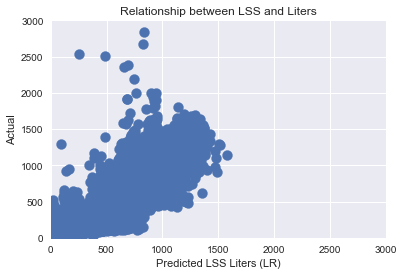

In [68]:
# Is the relationship linear
plt.scatter(Y_pred_test, Y_test)
plt.xlim( 0, 3000 ) 
plt.ylim( 0, 3000 ) 
plt.xlabel("Predicted LSS Liters (LR)")
plt.ylabel("Actual")
plt.title("Relationship between LSS and Liters")

# Fitting Regression Trees

This exercise on Decision Trees is a Python adaptation of p. 324-331 of "Introduction to Statistical Learning with
Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. Original adaptation by J. Warmenhoven, updated by R. Jordan Crouser at Smith
College for SDS293: Machine Learning (Spring 2016).

Now let's try fitting a **regression tree** to the ${\tt Fuel}$ data set. First, we use the
training set, and fit the tree to the training data using ${\tt Liters}$ (Fuel Consumption) as our response:

In [69]:
import graphviz
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

In [70]:
# Pruning not supported. Choosing max depth 2)
dtr = DecisionTreeRegressor(max_depth=2)
dtr.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

Let's take a look at the tree:

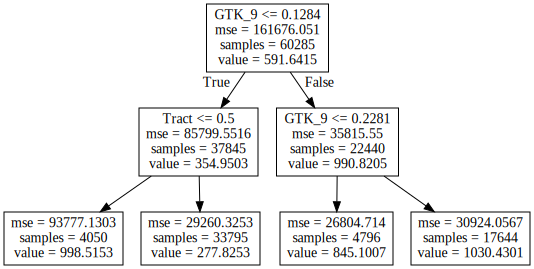

In [71]:
export_graphviz(dtr, out_file="mytree.dot", feature_names=X_train.columns)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Now let's see how it does on the test data:

32345.289672205738

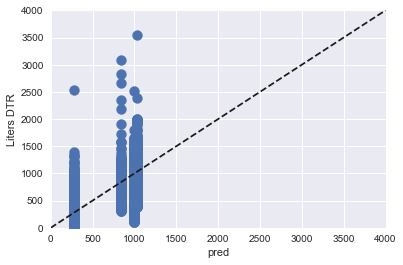

In [72]:
pred = dtr.predict(X_test)

plt.scatter(pred, Y_test, label='Liters')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Liters DTR')
plt.xlim( 0, 4000 ) 
plt.ylim( 0, 4000 ) 
mean_squared_error(Y_test, pred)

In [73]:
D_T_dtr = len(X_test.columns)
feature_cols_dtr = list(X_test.columns)
mean_squared_error(Y_test, dtr.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = dtr.predict(X_train[feature_cols_dtr])
RSS_TRAIN_dtr = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_dtr = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_dtr = len(X_train)   
RSE_TRAIN_dtr = ((RSS_TRAIN_dtr/(N_TRAIN_dtr-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = dtr.predict(X_test[feature_cols_dtr])
RSS_TEST_dtr = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_dtr = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_dtr = len(X_test)  
RSE_TEST_dtr = ((RSS_TEST_dtr/(N_TEST_dtr-2)) ** 0.5)
   
MSE_TRAIN_dtr = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_dtr = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_dtr = r2_score(Y_train, Y_pred_train) 
R2s_TEST_dtr = r2_score(Y_test, Y_pred_test) 


print("Tree dtr Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_dtr, RSS_TEST_dtr))
print("Tree dtr Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_dtr, TSS_TEST_dtr))
print("Tree dtr Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_dtr*100), (R2s_TEST_dtr*100)))   

  
print("Tree dtr Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_dtr, MSE_TEST_dtr))    
print("Tree dtr Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_dtr, RSE_TEST_dtr))    
print("Tree Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} local Q: {3:6d}".format (D_T_dtr,N_TRAIN_dtr,N_TEST_dtr,N_TRAIN_dtr+N_TEST_dtr))


Y_pred_loc_dtr = dtr.predict(X_test[feature_cols_dtr])


Tree dtr Training RSS: 2042829534.52 Test RSS: 960461031.53
Tree dtr Training TSS: 9746640737.01 Test TSS: 4766021354.31
Tree dtr Training R2s:   79.0% Test R2s:   79.8%
Tree dtr Training MSE: 33886.20 Test MSE: 32345.29
Tree dtr Training RSE: 184.09 Test RSE: 179.85
Tree Coeffients:     60 Train Q:  60285 Test Q:  29694 local Q:  89979


The test set MSE associated with the regression tree is
74379. The square root of the MSE is therefore around 272.7, indicating
that this model leads to test predictions that are within around 270 liters of
the true fuel for the train.
    
# 8.3.3 Bagging and Random Forests

Let's see if we can improve on this result using **bagging** and **random forests**. The exact results obtained in this section may
depend on the version of ${\tt python}$ and the version of the ${\tt RandomForestRegressor}$ package
installed on your computer, so don't stress out if you don't match up exactly with the book. Recall that **bagging** is simply a special case of
a **random forest** with $m = p$. Therefore, the ${\tt RandomForestRegressor()}$ function can
be used to perform both random forests and bagging. Let's start with bagging:

In [74]:
# Bagging: using all features
bagging = RandomForestRegressor(max_features=25, random_state=1)
bagging.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=25, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

The argument ${\tt max\_features=25}$ indicates that all 25 predictors should be considered
for each split of the tree -- in other words, that bagging should be done. How
well does this bagged model perform on the test set?

9648.5448049480601

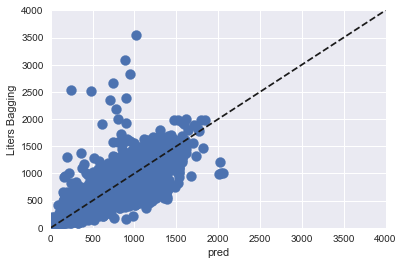

In [75]:
pred = bagging.predict(X_test)
plt.scatter(pred, Y_test, label='Liters')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Liters Bagging')
plt.xlim( 0, 4000 ) 
plt.ylim( 0, 4000 ) 
mean_squared_error(Y_test, pred)

In [76]:
D_T_bagging = len(X_test.columns)
feature_cols_bagging = list(X_test.columns)
mean_squared_error(Y_test, bagging.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = bagging.predict(X_train[feature_cols_bagging])
RSS_TRAIN_bagging = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_bagging = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_bagging = len(X_train)   
RSE_TRAIN_bagging = ((RSS_TRAIN_bagging/(N_TRAIN_bagging-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = bagging.predict(X_test[feature_cols_bagging])
RSS_TEST_bagging = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_bagging = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_bagging = len(X_test)  
RSE_TEST_bagging = ((RSS_TEST_bagging/(N_TEST_bagging-2)) ** 0.5)
   
MSE_TRAIN_bagging = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_bagging = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_bagging = r2_score(Y_train, Y_pred_train) 
R2s_TEST_bagging = r2_score(Y_test, Y_pred_test) 


print("Tree bagging Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_bagging, RSS_TEST_bagging))
print("Tree bagging Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_bagging, TSS_TEST_bagging))
print("Tree bagging Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_bagging*100), (R2s_TEST_bagging*100)))   

  
print("Tree bagging Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_bagging, MSE_TEST_bagging))    
print("Tree bagging Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_bagging, RSE_TEST_bagging))    
print("Tree Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} local Q: {3:6d}".format (D_T_bagging,N_TRAIN_bagging,N_TEST_bagging,N_TRAIN_bagging+N_TEST_bagging))

Y_pred_loc_bgg = bagging.predict(X[feature_cols_bagging])



Tree bagging Training RSS: 208904102.17 Test RSS: 286503889.44
Tree bagging Training TSS: 9746640737.01 Test TSS: 4766021354.31
Tree bagging Training R2s:   97.9% Test R2s:   94.0%
Tree bagging Training MSE: 3465.27 Test MSE: 9648.54
Tree bagging Training RSE:  58.87 Test RSE:  98.23
Tree Coeffients:     60 Train Q:  60285 Test Q:  29694 local Q:  89979


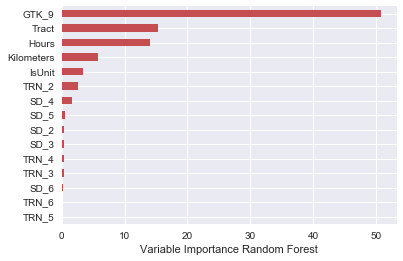

In [77]:
feature_importance = bagging.feature_importances_*100
rel_imp = pd.Series(feature_importance[0:15], index=X.columns[0:15]).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance Random Forest')
plt.gca().legend_ = None

We can grow a random forest in exactly the same way, except that
we'll use a smaller value of the ${\tt max\_features}$ argument. Here we'll
use ${\tt max\_features = 6}$:

In [78]:
# Random forests: using 6 features
rd_ft = RandomForestRegressor(max_features=6, random_state=1)
rd_ft.fit(X_train, Y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

10431.164059852166

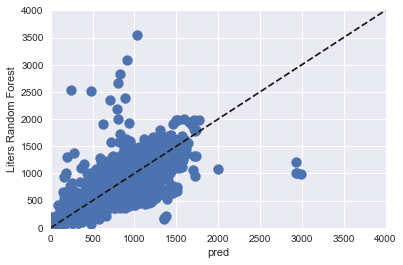

In [79]:
pred = rd_ft.predict(X_test)
plt.scatter(pred, Y_test, label='Liters')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Liters Random Forest')
plt.xlim( 0, 4000 ) 
plt.ylim( 0, 4000 ) 
mean_squared_error(Y_test, pred)

In [80]:
D_T_rd_ft = len(X_test.columns)
feature_cols_rd_ft = list(X_test.columns)
mean_squared_error(Y_test, rd_ft.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = rd_ft.predict(X_train[feature_cols_rd_ft])
RSS_TRAIN_rd_ft = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_rd_ft = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_rd_ft = len(X_train)   
RSE_TRAIN_rd_ft = ((RSS_TRAIN_rd_ft/(N_TRAIN_rd_ft-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = rd_ft.predict(X_test[feature_cols_rd_ft])
RSS_TEST_rd_ft = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_rd_ft = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_rd_ft = len(X_test)  
RSE_TEST_rd_ft = ((RSS_TEST_rd_ft/(N_TEST_rd_ft-2)) ** 0.5)
   
MSE_TRAIN_rd_ft = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_rd_ft = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_rd_ft = r2_score(Y_train, Y_pred_train) 
R2s_TEST_rd_ft = r2_score(Y_test, Y_pred_test) 


print("Tree rd_ft Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_rd_ft, RSS_TEST_rd_ft))
print("Tree rd_ft Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_rd_ft, TSS_TEST_rd_ft))
print("Tree rd_ft Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_rd_ft*100), (R2s_TEST_rd_ft*100)))   

  
print("Tree rd_ft Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_rd_ft, MSE_TEST_rd_ft))    
print("Tree rd_ft Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_rd_ft, RSE_TEST_rd_ft))    
print("Tree Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} local Q: {3:6d}".format (D_T_rd_ft,N_TRAIN_rd_ft,N_TEST_rd_ft,N_TRAIN_rd_ft+N_TEST_rd_ft))


Y_pred_loc_rd_ft = rd_ft.predict(X[feature_cols_rd_ft])


Tree rd_ft Training RSS: 216901422.04 Test RSS: 309742985.59
Tree rd_ft Training TSS: 9746640737.01 Test TSS: 4766021354.31
Tree rd_ft Training R2s:   97.8% Test R2s:   93.5%
Tree rd_ft Training MSE: 3597.93 Test MSE: 10431.16
Tree rd_ft Training RSE:  59.98 Test RSE: 102.14
Tree Coeffients:     60 Train Q:  60285 Test Q:  29694 local Q:  89979


The test set MSE is even lower; this indicates that random forests yielded an
improvement over bagging in this case.

Using the ${\tt feature\_importances\_}$ attribute of the ${\tt RandomForestRegressor}$, we can view the importance of each
variable:

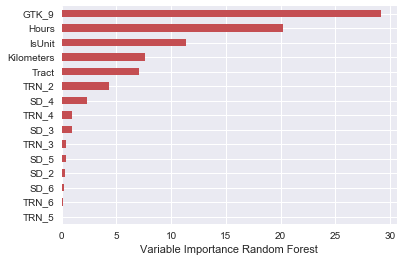

In [81]:
feature_importance = rd_ft.feature_importances_*100
rel_imp = pd.Series(feature_importance[0:15], index=X.columns[0:15]).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance Random Forest')
plt.gca().legend_ = None

The results indicate that across all of the trees considered in the random
forest, the Gross Ton Kilometers (${\tt GTK_9}$) , the locomotive type (${\tt MOD_38}$) , and the time type (${\tt Hours}$)
are by far the three most important variables.

# Boosting

Now we'll use the ${\tt GradientBoostingRegressor}$ package to fit **boosted
regression trees** to the ${\tt Fuel}$ data set. The
argument ${\tt n_estimators=500}$ indicates that we want 500 trees, and the option
${\tt interaction.depth=4}$ limits the depth of each tree:

In [82]:
boost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=1)
boost.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=1, subsample=1.0, verbose=0,
             warm_start=False)

11424.781255209109

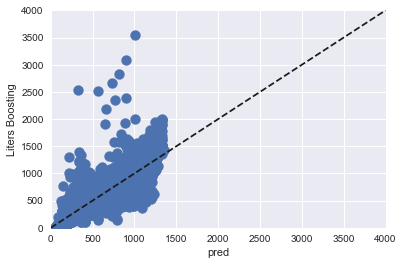

In [83]:
pred = boost.predict(X_test)
plt.scatter(pred, Y_test, label='Liters')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Liters Boosting')
plt.xlim( 0, 4000 ) 
plt.ylim( 0, 4000 ) 
mean_squared_error(Y_test, pred)

In [84]:
D_T_boost = len(X_test.columns)
feature_cols_boost = list(X_test.columns)
mean_squared_error(Y_test, boost.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = boost.predict(X_train[feature_cols_boost])
RSS_TRAIN_boost = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_boost = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_boost = len(X_train)   
RSE_TRAIN_boost = ((RSS_TRAIN_boost/(N_TRAIN_boost-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = boost.predict(X_test[feature_cols_boost])
RSS_TEST_boost = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_boost = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_boost = len(X_test)  
RSE_TEST_boost = ((RSS_TEST_boost/(N_TEST_boost-2)) ** 0.5)
   
MSE_TRAIN_boost = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_boost = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_boost = r2_score(Y_train, Y_pred_train) 
R2s_TEST_boost = r2_score(Y_test, Y_pred_test) 


print("Tree boost Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_boost, RSS_TEST_boost))
print("Tree boost Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_boost, TSS_TEST_boost))
print("Tree boost Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_boost*100), (R2s_TEST_boost*100)))   

  
print("Tree boost Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_boost, MSE_TEST_boost))    
print("Tree boost Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_boost, RSE_TEST_boost))    
print("Tree Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} local Q: {3:6d}".format (D_T_boost,N_TRAIN_boost,N_TEST_boost,N_TRAIN_boost+N_TEST_boost))


Y_pred_loc_boost = boost.predict(X[feature_cols_boost])


Tree boost Training RSS: 762629837.65 Test RSS: 339247454.59
Tree boost Training TSS: 9746640737.01 Test TSS: 4766021354.31
Tree boost Training R2s:   92.2% Test R2s:   92.9%
Tree boost Training MSE: 12650.41 Test MSE: 11424.78
Tree boost Training RSE: 112.48 Test RSE: 106.89
Tree Coeffients:     60 Train Q:  60285 Test Q:  29694 local Q:  89979


Let's check out the feature importances again:

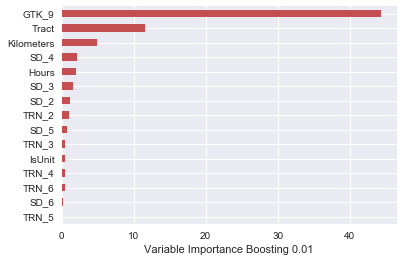

In [85]:
feature_importance = boost.feature_importances_*100
rel_imp = pd.Series(feature_importance[0:15], index=X.columns[0:15]).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance Boosting 0.01')
plt.gca().legend_ = None

We see that ${\tt GTK}$, ${\tt Hours}$, ${\tt Kilometers}$ are again the most important variables by far, but the track appears more important than the locomotive model. Now let's use the boosted model to predict ${\tt Liters}$ on the test set:

In [86]:
mean_squared_error(Y_test, boost.predict(X_test))

11424.781255209109

The test MSE obtained is similar to the test MSE for random forests
and superior to that for bagging. If we want to, we can perform boosting
with a different value of the shrinkage parameter $\lambda$. Here we take $\lambda = 0.2$:

In [87]:
boost_s = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=4, random_state=1)
boost_s.fit(X_train, Y_train)
mean_squared_error(Y_test, boost_s.predict(X_test))

8533.8618661042274

In this case, using $\lambda = 0.2$ leads to a slightly lower test MSE than $\lambda = 0.01$.

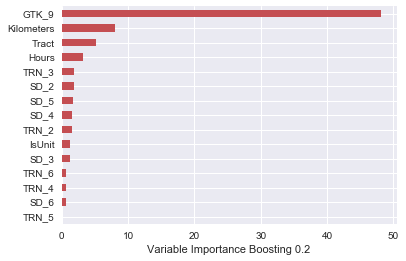

In [88]:
feature_importance = boost_s.feature_importances_*100
rel_imp = pd.Series(feature_importance[0:15], index=X.columns[0:15]).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance Boosting 0.2')
plt.gca().legend_ = None

8533.8618661042274

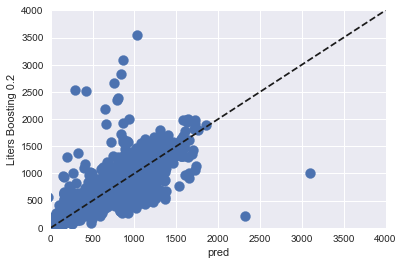

In [89]:
pred = boost_s.predict(X_test)
plt.scatter(pred, Y_test, label='Liters')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Liters Boosting 0.2')
plt.xlim( 0, 4000 ) 
plt.ylim( 0, 4000 ) 
mean_squared_error(Y_test, pred)

In [90]:
D_T_boost_s = len(X_test.columns)
feature_cols_boost_s = list(X_test.columns)
mean_squared_error(Y_test, boost_s.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = boost_s.predict(X_train[feature_cols_boost_s])
RSS_TRAIN_boost_s = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_boost_s = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_boost_s = len(X_train)   
RSE_TRAIN_boost_s = ((RSS_TRAIN_boost_s/(N_TRAIN_boost_s-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = boost_s.predict(X_test[feature_cols_boost_s])
RSS_TEST_boost_s = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_boost_s = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_boost_s = len(X_test)  
RSE_TEST_boost_s = ((RSS_TEST_boost_s/(N_TEST_boost_s-2)) ** 0.5)
   
MSE_TRAIN_boost_s = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_boost_s = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_boost_s = r2_score(Y_train, Y_pred_train) 
R2s_TEST_boost_s = r2_score(Y_test, Y_pred_test) 


print("Tree boost_s Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_boost_s, RSS_TEST_boost_s))
print("Tree boost_s Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_boost_s, TSS_TEST_boost_s))
print("Tree boost_s Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_boost_s*100), (R2s_TEST_boost_s*100)))   

  
print("Tree boost_s Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_boost_s, MSE_TEST_boost_s))    
print("Tree boost_s Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_boost_s, RSE_TEST_boost_s))    
print("Tree Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} local Q: {3:6d}".format (D_T_boost_s,N_TRAIN_boost_s,N_TEST_boost_s,N_TRAIN_boost_s+N_TEST_boost_s))


Y_pred_loc_boost_s = boost_s.predict(X[feature_cols_boost])


Tree boost_s Training RSS: 415208591.89 Test RSS: 253404494.25
Tree boost_s Training TSS: 9746640737.01 Test TSS: 4766021354.31
Tree boost_s Training R2s:   95.7% Test R2s:   94.7%
Tree boost_s Training MSE: 6887.43 Test MSE: 8533.86
Tree boost_s Training RSE:  82.99 Test RSE:  92.38
Tree Coeffients:     60 Train Q:  60285 Test Q:  29694 local Q:  89979


# XGBoosting

Now we'll use the ${\tt XGBRegressor}$ package to fit **Extreme boosted
regression trees** to the ${\tt Fuel}$ data set. The
argument ${\tt n_estimators=500}$ indicates that we want 500 trees, and the option
${\tt interaction.depth=4}$ limits the depth of each tree:

In [91]:
#import os

#mingw_path = 'C:\Program Files\mingw-w64\x86_64-7.1.0-posix-seh-rt_v5-rev2\mingw64\bin'

#os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [92]:
import xgboost as xgb
from xgboost import XGBRegressor


In [93]:
xgboost1 = XGBRegressor(n_estimators=500, learning_rate=0.2, max_depth=4, random_state=1)
# fit the model with training data
xgboost1.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

8339.4229657414726

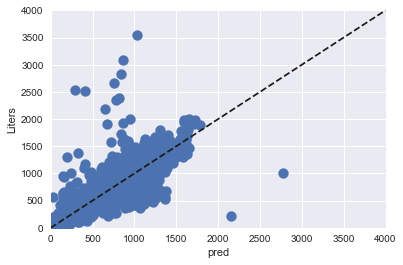

In [94]:
# Make pedictions for test data
pred = xgboost1.predict(X_test)

plt.scatter(pred, Y_test, label='Liters')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Liters')
plt.xlim( 0, 4000 ) 
plt.ylim( 0, 4000 ) 
mean_squared_error(Y_test, pred)

In [95]:
D_T_xgboost1 = len(X_test.columns)
feature_cols_xgboost1 = list(X_test.columns)
mean_squared_error(Y_test, xgboost1.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = xgboost1.predict(X_train[feature_cols_xgboost1])
RSS_TRAIN_xgboost1 = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_xgboost1 = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_xgboost1 = len(X_train)   
RSE_TRAIN_xgboost1 = ((RSS_TRAIN_xgboost1/(N_TRAIN_xgboost1-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = xgboost1.predict(X_test[feature_cols_xgboost1])
RSS_TEST_xgboost1 = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_xgboost1 = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_xgboost1 = len(X_test)  
RSE_TEST_xgboost1 = ((RSS_TEST_xgboost1/(N_TEST_xgboost1-2)) ** 0.5)
   
MSE_TRAIN_xgboost1 = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_xgboost1 = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_xgboost1 = r2_score(Y_train, Y_pred_train) 
R2s_TEST_xgboost1 = r2_score(Y_test, Y_pred_test) 


print("Tree xgboost1 Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_xgboost1, RSS_TEST_xgboost1))
print("Tree xgboost1 Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_xgboost1, TSS_TEST_xgboost1))
print("Tree xgboost1 Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_xgboost1*100), (R2s_TEST_xgboost1*100)))   

  
print("Tree xgboost1 Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_xgboost1, MSE_TEST_xgboost1))    
print("Tree xgboost1 Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_xgboost1, RSE_TEST_xgboost1))    
print("Tree Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} local Q: {3:6d}".format (D_T_xgboost1,N_TRAIN_xgboost1,N_TEST_xgboost1,N_TRAIN_xgboost1+N_TEST_xgboost1))


Y_pred_loc_xgb = xgboost1.predict(X[feature_cols_xgboost1])


Tree xgboost1 Training RSS: 433902688.00 Test RSS: 247630832.00
Tree xgboost1 Training TSS: 9746640737.01 Test TSS: 4766021354.31
Tree xgboost1 Training R2s:   95.5% Test R2s:   94.8%
Tree xgboost1 Training MSE: 7197.52 Test MSE: 8339.42
Tree xgboost1 Training RSE:  84.84 Test RSE:  91.32
Tree Coeffients:     60 Train Q:  60285 Test Q:  29694 local Q:  89979


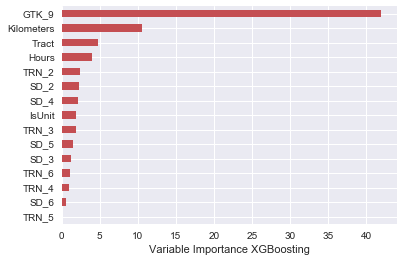

In [96]:
feature_importance = xgboost1.feature_importances_*100
rel_imp = pd.Series(feature_importance[0:15], index=X.columns[0:15]).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance XGBoosting')
plt.gca().legend_ = None

In [97]:
xgboost_s = XGBRegressor(
        learning_rate =0.075,
        n_estimators=500,
        max_depth=7,
        min_child_weight=10,
        gamma=0,
        subsample=0.85,
        colsample_bytree=0.85,
        reg_alpha=10,
        objective= 'reg:linear',
        nthread=4,
        scale_pos_weight=1,
        seed=27)

# fit the model with training data
xgboost_s.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.85, gamma=0, learning_rate=0.075,
       max_delta_step=0, max_depth=7, min_child_weight=10, missing=None,
       n_estimators=500, n_jobs=1, nthread=4, objective='reg:linear',
       random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.85)

7956.3138575449175

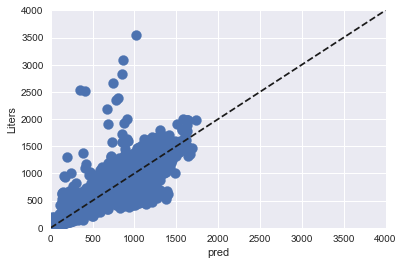

In [98]:
# Make pedictions for test data
pred = xgboost_s.predict(X_test)

plt.scatter(pred, Y_test, label='Liters')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Liters')
plt.xlim( 0, 4000 ) 
plt.ylim( 0, 4000 ) 
mean_squared_error(Y_test, pred)

In [99]:
D_T_xgboost_s = len(X_test.columns)
feature_cols_xgboost_s = list(X_test.columns)
mean_squared_error(Y_test, xgboost_s.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = xgboost_s.predict(X_train[feature_cols_xgboost_s])
RSS_TRAIN_xgboost_s = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_xgboost_s = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_xgboost_s = len(X_train)   
RSE_TRAIN_xgboost_s = ((RSS_TRAIN_xgboost_s/(N_TRAIN_xgboost_s-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = xgboost_s.predict(X_test[feature_cols_xgboost_s])
RSS_TEST_xgboost_s = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_xgboost_s = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_xgboost_s = len(X_test)  
RSE_TEST_xgboost_s = ((RSS_TEST_xgboost_s/(N_TEST_xgboost_s-2)) ** 0.5)
   
MSE_TRAIN_xgboost_s = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_xgboost_s = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_xgboost_s = r2_score(Y_train, Y_pred_train) 
R2s_TEST_xgboost_s = r2_score(Y_test, Y_pred_test) 


print("Tree xgboost_s Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_xgboost_s, RSS_TEST_xgboost_s))
print("Tree xgboost_s Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_xgboost_s, TSS_TEST_xgboost_s))
print("Tree xgboost_s Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_xgboost_s*100), (R2s_TEST_xgboost_s*100)))   

  
print("Tree xgboost_s Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_xgboost_s, MSE_TEST_xgboost_s))    
print("Tree xgboost_s Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_xgboost_s, RSE_TEST_xgboost_s))    
print("Tree Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} local Q: {3:6d}".format (D_T_xgboost_s,N_TRAIN_xgboost_s,N_TEST_xgboost_s,N_TRAIN_xgboost_s+N_TEST_xgboost_s))

Y_pred_loc_xgbs = xgboost_s.predict(X[feature_cols_xgboost_s])


Tree xgboost_s Training RSS: 453214464.00 Test RSS: 236254784.00
Tree xgboost_s Training TSS: 9746640737.01 Test TSS: 4766021354.31
Tree xgboost_s Training R2s:   95.4% Test R2s:   95.0%
Tree xgboost_s Training MSE: 7517.86 Test MSE: 7956.31
Tree xgboost_s Training RSE:  86.71 Test RSE:  89.20
Tree Coeffients:     60 Train Q:  60285 Test Q:  29694 local Q:  89979


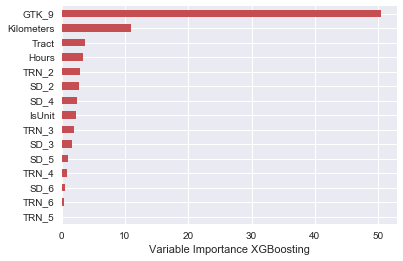

In [100]:
feature_importance = xgboost_s.feature_importances_*100
rel_imp = pd.Series(feature_importance[0:15], index=X.columns[0:15]).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance XGBoosting')
plt.gca().legend_ = None

In [101]:
#lm_cols = ["Model", "Coef", "MSE TRAIN", "MSE TEST", "RSS", "TSS", "R2s", "RSE"]
lm_cols = ["Model", "Coef", "MSE TRAIN", "MSE TEST", "R2s", "RSE"]
# Create a DataFrame to store the results of our SE calculations
ml_errors = pd.DataFrame(columns=lm_cols, index=range(1,13))
ml_errors['Model'].astype(str)


# LR local
ml_errors.set_value(1, 'Model', 'LR loc')
ml_errors.set_value(1, 'Coef', D_T)
ml_errors.set_value(1, 'MSE TRAIN', MSE_TRAIN_T)
ml_errors.set_value(1, 'MSE TEST', MSE_TEST_T)
#ml_errors.set_value(1, 'RSS', RSS_TEST_T)
#ml_errors.set_value(1, 'TSS', TSS_TEST_T)
ml_errors.set_value(1, 'R2s', (R2s_TEST_T*100))
ml_errors.set_value(1, 'RSE', RSE_TEST_T)

# LR Forward Selection
ml_errors.set_value(2, 'Model', 'LR Fwd')
ml_errors.set_value(2, 'Coef', D_T_F)
ml_errors.set_value(2, 'MSE TRAIN', MSE_TRAIN_F)
ml_errors.set_value(2, 'MSE TEST', MSE_TEST_F)
#ml_errors.set_value(2, 'RSS', RSS_TEST_F)
#ml_errors.set_value(2, 'TSS', TSS_TEST_F)
ml_errors.set_value(2, 'R2s', (R2s_TEST_F*100))
ml_errors.set_value(2, 'RSE', RSE_TEST_F)

# LR Backward Selection
ml_errors.set_value(3, 'Model', 'LR Bwd')
#ml_errors.set_value(3, 'Coef', D_T_B)
#ml_errors.set_value(3, 'MSE TRAIN', MSE_TRAIN_B)
#ml_errors.set_value(3, 'MSE TEST', MSE_TEST_B)
#ml_errors.set_value(3, 'RSS', RSS_TEST_B)
#ml_errors.set_value(3, 'TSS', TSS_TEST_B)
#ml_errors.set_value(3, 'R2s', (R2s_TEST_B*100))
#ml_errors.set_value(3, 'RSE', RSE_TEST_B)

# LR Cross Validation
ml_errors.set_value(4, 'Model', 'LR CV')
ml_errors.set_value(4, 'Coef', D_T_CV)
ml_errors.set_value(4, 'MSE TRAIN', MSE_TRAIN_CV)
ml_errors.set_value(4, 'MSE TEST', MSE_TEST_CV)
#ml_errors.set_value(4, 'RSS', RSS_TEST_CV)
#ml_errors.set_value(4, 'TSS', TSS_TEST_CV)
ml_errors.set_value(4, 'R2s', (R2s_TEST_CV*100))
ml_errors.set_value(4, 'RSE', RSE_TEST_CV)

# Ridge
ml_errors.set_value(5, 'Model', 'Ridge')
ml_errors.set_value(5, 'Coef', D_T_RDG)
ml_errors.set_value(5, 'MSE TRAIN', MSE_TRAIN_RDG)
ml_errors.set_value(5, 'MSE TEST', MSE_TEST_RDG)
#ml_errors.set_value(5, 'RSS', RSS_TEST_RDG)
#ml_errors.set_value(5, 'TSS', TSS_TEST_RDG)
ml_errors.set_value(5, 'R2s', (R2s_TEST_RDG*100))
ml_errors.set_value(5, 'RSE', RSE_TEST_RDG)

# Lasso
ml_errors.set_value(6, 'Model', 'Lasso')
ml_errors.set_value(6, 'Coef', D_T_LSS)
ml_errors.set_value(6, 'MSE TRAIN', MSE_TRAIN_LSS)
ml_errors.set_value(6, 'MSE TEST', MSE_TEST_LSS)
#ml_errors.set_value(6, 'RSS', RSS_TEST_LSS)
#ml_errors.set_value(6, 'TSS', TSS_TEST_LSS)
ml_errors.set_value(6, 'R2s', (R2s_TEST_LSS*100))
ml_errors.set_value(6, 'RSE', RSE_TEST_LSS)

# Decision Tree Regression
ml_errors.set_value(7, 'Model', 'D Tree')
ml_errors.set_value(7, 'Coef', D_T_dtr)
ml_errors.set_value(7, 'MSE TRAIN', MSE_TRAIN_dtr)
ml_errors.set_value(7, 'MSE TEST', MSE_TEST_dtr)
#ml_errors.set_value(7, 'RSS', RSS_TEST_dtr)
#ml_errors.set_value(7, 'TSS', TSS_TEST_dtr)
ml_errors.set_value(7, 'R2s', (R2s_TEST_dtr*100))
ml_errors.set_value(7, 'RSE', RSE_TEST_dtr)

# Bagging
ml_errors.set_value(8, 'Model', 'Bagging')
ml_errors.set_value(8, 'Coef', D_T_bagging)
ml_errors.set_value(8, 'MSE TRAIN', MSE_TRAIN_bagging)
ml_errors.set_value(8, 'MSE TEST', MSE_TEST_bagging)
#ml_errors.set_value(8, 'RSS', RSS_TEST_bagging)
#ml_errors.set_value(8, 'TSS', TSS_TEST_bagging)
ml_errors.set_value(8, 'R2s', (R2s_TEST_bagging*100))
ml_errors.set_value(8, 'RSE', RSE_TEST_bagging)


# Random Forest
ml_errors.set_value(9, 'Model', 'Random Forest')
ml_errors.set_value(9, 'Coef', D_T_rd_ft)
ml_errors.set_value(9, 'MSE TRAIN', MSE_TRAIN_rd_ft)
ml_errors.set_value(9, 'MSE TEST', MSE_TEST_rd_ft)
#ml_errors.set_value(9, 'RSS', RSS_TEST_rd_ft)
#ml_errors.set_value(9, 'TSS', TSS_TEST_rd_ft)
ml_errors.set_value(9, 'R2s', (R2s_TEST_rd_ft*100))
ml_errors.set_value(9, 'RSE', RSE_TEST_rd_ft)


# Boosting
ml_errors.set_value(10, 'Model', 'Boosting')
ml_errors.set_value(10, 'Coef', D_T_boost)
ml_errors.set_value(10, 'MSE TRAIN', MSE_TRAIN_boost)
ml_errors.set_value(10, 'MSE TEST', MSE_TEST_boost)
#ml_errors.set_value(10, 'RSS', RSS_TEST_boost)
#ml_errors.set_value(10, 'TSS', TSS_TEST_boost)
ml_errors.set_value(10, 'R2s', (R2s_TEST_boost*100))
ml_errors.set_value(10, 'RSE', RSE_TEST_boost)


# Boosting 0.2
ml_errors.set_value(11, 'Model', 'Boosting 0.2')
ml_errors.set_value(11, 'Coef', D_T_boost_s)
ml_errors.set_value(11, 'MSE TRAIN', MSE_TRAIN_boost_s)
ml_errors.set_value(11, 'MSE TEST', MSE_TEST_boost_s)
#ml_errors.set_value(11, 'RSS', RSS_TEST_boost_s)
#ml_errors.set_value(11, 'TSS', TSS_TEST_boost_s)
ml_errors.set_value(11, 'R2s', (R2s_TEST_boost_s*100))
ml_errors.set_value(11, 'RSE', RSE_TEST_boost_s)

# Extreme Gradient Boosting
ml_errors.set_value(12, 'Model', 'XGBoosting')
ml_errors.set_value(12, 'Coef', D_T_xgboost1)
ml_errors.set_value(12, 'MSE TRAIN', MSE_TRAIN_xgboost1)
ml_errors.set_value(12, 'MSE TEST', MSE_TEST_xgboost1)
#ml_errors.set_value(12, 'RSS', RSS_TEST_xgboost1)
#ml_errors.set_value(12, 'TSS', TSS_TEST_xgboost1)
ml_errors.set_value(12, 'R2s', (R2s_TEST_xgboost1*100))
ml_errors.set_value(12, 'RSE', RSE_TEST_xgboost1)


# Extreme Gradient Boosting Tuning Parameters
ml_errors.set_value(13, 'Model', 'XGBoosting tp')
ml_errors.set_value(13, 'Coef', D_T_xgboost_s)
ml_errors.set_value(13, 'MSE TRAIN', MSE_TRAIN_xgboost_s)
ml_errors.set_value(13, 'MSE TEST', MSE_TEST_xgboost_s)
#ml_errors.set_value(13, 'RSS', RSS_TEST_xgboost_s)
#ml_errors.set_value(13, 'TSS', TSS_TEST_xgboost_s)
ml_errors.set_value(13, 'R2s', (R2s_TEST_xgboost_s*100))
ml_errors.set_value(13, 'RSE', RSE_TEST_xgboost_s)


ml_errors['Coef'] = ml_errors['Coef'].map('{:,.0f}'.format)
ml_errors['MSE TRAIN'] = ml_errors['MSE TRAIN'].map('{:,.0f}'.format)
ml_errors['MSE TEST'] = ml_errors['MSE TEST'].map('{:,.0f}'.format)
#ml_errors['RSS'] = ml_errors['RSS'].map('{:,.0f}'.format)
#ml_errors['TSS'] = ml_errors['TSS'].map('{:,.0f}'.format)
ml_errors['R2s'] = ml_errors['R2s'].map('{:,.2f}%'.format)
ml_errors['RSE'] = ml_errors['RSE'].map('{:,.2f}'.format)

ml_errors['Coef'] = ml_errors['Coef'].fillna(0)
ml_errors = ml_errors.fillna(0)
ml_errors.head(13)

,Model,Coef,MSE TRAIN,MSE TEST,R2s,RSE
1,LR loc,60,"24,538","23,483",85.37%,153.25
2,LR Fwd,59,"24,542","23,486",85.37%,153.26
3,LR Bwd,nan,nan,nan,nan%,nan
4,LR CV,59,"24,545","23,478",85.37%,153.23
5,Ridge,60,"24,874","23,658",85.26%,153.82
6,Lasso,59,"24,698","23,649",85.27%,153.79
7,D Tree,60,"33,886","32,345",79.85%,179.85
8,Bagging,60,"3,465","9,649",93.99%,98.23
9,Random Forest,60,"3,598","10,431",93.50%,102.14
10,Boosting,60,"12,650","11,425",92.88%,106.89


In [102]:
# Record the original liters to the dataframe
X['Liters'] = y
X['Liters_regr'] = Y_pred_loc_regr
X['Liters_regr_f'] = Y_pred_loc_f
#X['Liters_regr_b'] = Y_pred_loc_b
X['Liters_regr_cv'] = Y_pred_loc_cv
X['Liters_regr_rdg'] = Y_pred_loc_rdg
X['Liters_regr_lss'] = Y_pred_loc_lss
#X['Liters_dtr'] = Y_pred_loc_dtr
X['Liters_bgg'] = Y_pred_loc_bgg
X['Liters_rd_ft'] = Y_pred_loc_rd_ft
X['Liters_boost'] = Y_pred_loc_boost
X['Liters_boost_s'] = Y_pred_loc_boost_s
X['Liters_xgb'] = Y_pred_loc_xgb
X['Liters_xgb_s'] = Y_pred_loc_xgbs

X['GTK'] = ((X['GTK_9'] * 1000000000)).astype(float)

X = X.round({'Liters_regr': 0, 'Liters_regr_f': 0, 'Liters_regr_b': 0, 'Liters_regr_cv': 0, 'Liters_regr_rdg': 0, 
         'Liters_regr_lss': 0, 'Liters_bgg': 0, 'Liters_rd_ft': 0, 'Liters_boost': 0, 'Liters_boost_s': 0, 
         'Liters_xgb': 0, 'Liters_xgb_s': 0, 'Liters': 1, 'GTK_9': 8, 'GTK': 0})

# Export the results
X.to_csv('Fuel Efficiciency/Fuel_FO_2010-17_loc_lr_pred.csv', sep = ';',encoding='latin-1')

In [103]:
X.head()

,GTK_9,Hours,Kilometers,IsUnit,Tract,SD_2,SD_3,SD_4,SD_5,SD_6,...,Liters_regr_cv,Liters_regr_rdg,Liters_regr_lss,Liters_bgg,Liters_rd_ft,Liters_boost,Liters_boost_s,Liters_xgb,Liters_xgb_s,GTK
Ind,,,,,,,,,,,,,,,,,,,,,
0,0.035629,0,56,1,1,0,0,0,0,0,...,363.0,395.0,374.0,209.0,201.0,276.0,247.0,239.0,224.0,35628557.0
1,0.021195,0,35,1,1,0,0,0,0,0,...,109.0,131.0,120.0,143.0,143.0,225.0,158.0,159.0,151.0,21194784.0
2,0.083729,0,56,1,1,0,0,0,0,0,...,377.0,410.0,388.0,361.0,334.0,366.0,390.0,380.0,380.0,83729250.0
3,0.020672,0,35,1,1,0,0,0,0,0,...,150.0,226.0,132.0,121.0,121.0,225.0,132.0,133.0,129.0,20671794.0
4,0.026642,0,56,1,1,0,0,0,0,0,...,188.0,218.0,194.0,164.0,164.0,225.0,155.0,154.0,163.0,26641908.0


In [104]:
# Export the results
ml_errors.to_csv('Fuel Efficiciency/Fuel_FO_2010-17_loc_ml_error.csv', sep = ';',encoding='latin-1')